In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the training data frame
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


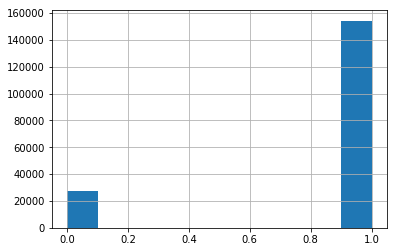

In [4]:
labels = df.project_is_approved
labels.hist()

In [5]:
not_approved = df[df['project_is_approved'] == 0]
approved = df[df['project_is_approved'] == 1]
pct_approved = len(approved) / len(df) * 100
print("total number of projects: {}".format(len(df)))
print("# of projects not approved: {}".format(len(not_approved)))
print("# of projects approved: {}".format(len(approved)))
print("Project Approval Rate: {0:.2f}%".format(pct_approved))

total number of projects: 182080
# of projects not approved: 27734
# of projects approved: 154346
Project Approval Rate: 84.77%


In [6]:
# Check for missing values
df.isna().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       4
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 175706
project_essay_4                                 175706
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [7]:
# remove columns because of the number of missing values
cols_to_drop = ['project_title', 'project_essay_1', 'project_essay_2', 'project_resource_summary', 'project_submitted_datetime',
               "id", "project_essay_3", "project_essay_4", "project_is_approved"]
df.drop(cols_to_drop, axis=1, inplace=True)
df.isna().sum()

teacher_id                                      0
teacher_prefix                                  4
school_state                                    0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
teacher_number_of_previously_posted_projects    0
dtype: int64

In [8]:
# check for multiple occurences of the same teacher
repeat_teacher = df[df["teacher_id"] == df.iloc[0]["teacher_id"]]
repeat_teacher

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects
0,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,Literacy,26
2883,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,Literacy,20
19492,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,Literacy,26
68253,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,"Literacy, Literature & Writing",33
68549,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,"ESL, Literacy",29
141978,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",20
151326,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,"Literacy, Literature & Writing",34
161287,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Math & Science,Mathematics,24
165689,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",24
174068,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,Literacy,29


In [9]:
for col in df.columns:
    print("-" * 40)
    print("column name: {}".format(col))
    print("# of unique values: {}".format(len(df[col].unique())))

----------------------------------------
column name: teacher_id
# of unique values: 104414
----------------------------------------
column name: teacher_prefix
# of unique values: 6
----------------------------------------
column name: school_state
# of unique values: 51
----------------------------------------
column name: project_grade_category
# of unique values: 4
----------------------------------------
column name: project_subject_categories
# of unique values: 51
----------------------------------------
column name: project_subject_subcategories
# of unique values: 407
----------------------------------------
column name: teacher_number_of_previously_posted_projects
# of unique values: 401


In [18]:
repeat_teachers = df.groupby('teacher_id').count()
repeat_teachers


,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects
teacher_id,,,,,,
00000f7264c27ba6fea0c837ed6aa0aa,1,1,1,1,1,1
00002d44003ed46b066607c5455a999a,3,3,3,3,3,3
00006084c3d92d904a22e0a70f5c119a,2,2,2,2,2,2
0000a9af8b6b9cc9e41f53322a8b8cf1,2,2,2,2,2,2
0000d4777d14b33a1406dd6c9019fe89,1,1,1,1,1,1
00019a280fc05dd4f228d75a12c6e021,1,1,1,1,1,1
0001f63e9437ebbba6ddaae0664037a7,1,1,1,1,1,1
000233fb8cbd3fcd20304423156cdf39,1,1,1,1,1,1
0002bcb9f69cd91cbeae163fc9cd874f,4,4,4,4,4,4


<center><h2>To Do:</h2></center>

<center><h3>EDA Questions to Answer</h3></center>
1. Does gender matter?
1. Does essay length matter?
1. Does grade matter?
1. Does state matter?
1. Does project subject categories matter?
1. Explore rejected subset
1. Explore accepted subset
1. Check each column's correlation with target
1. Separate out the essay columns
1. Find threshold of teachers accepted multiple times
1. Find threshold of teachers rejected multiple times

<center><h2>Feature Engineering & Modeling</h2></center>

1. Create "Previous successes" column?
1. Remove `teacher_id` to reduce dimensionality
1. One-hot encode dataframe
1. Try shallow algos first--XGboost, RF, SVM, Bayes?
1. Fit model without project-essay columns and compare to baseline accuracy
1. Oversampling needed to deal with class imbalance?

<center><h3>NLP Considerations</h3></center>

Only trying this route if other modeling steps don't significantly improve on baseline accuracy

1. Remove stop words
1. TF-IDF on essays?
1. Does sentiment matter?
1. Does word choice matter?
1. What words matter most?